First 5 rows of the data:
    Invoice ID Branch  Yangon  Naypyitaw  Mandalay Customer type Gender  \
0  750-67-8428      A       1          0         0        Normal   Male   
1  226-31-3081      C       0          1         0        Normal   Male   
2  631-41-3108      A       1          0         0        Normal   Male   
3  123-19-1176      A       1          0         0        Normal   Male   
4  373-73-7910      A       1          0         0        Normal   Male   

             Product line Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty      74.69         7  26.1415       NaN   1/5/2019   
1  Electronic accessories      15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle      46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty      58.22         8      NaN  489.0480  1/27/2019   
4       Sports and travel      86.31         7  30.2085  634.3785   2/8/2019   

        Time      Payment  Rating  
0     

<ipython-input-3-080263a6657b>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-3-080263a6657b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Branch', y='Total_Sales', data=df, palette='Set2')


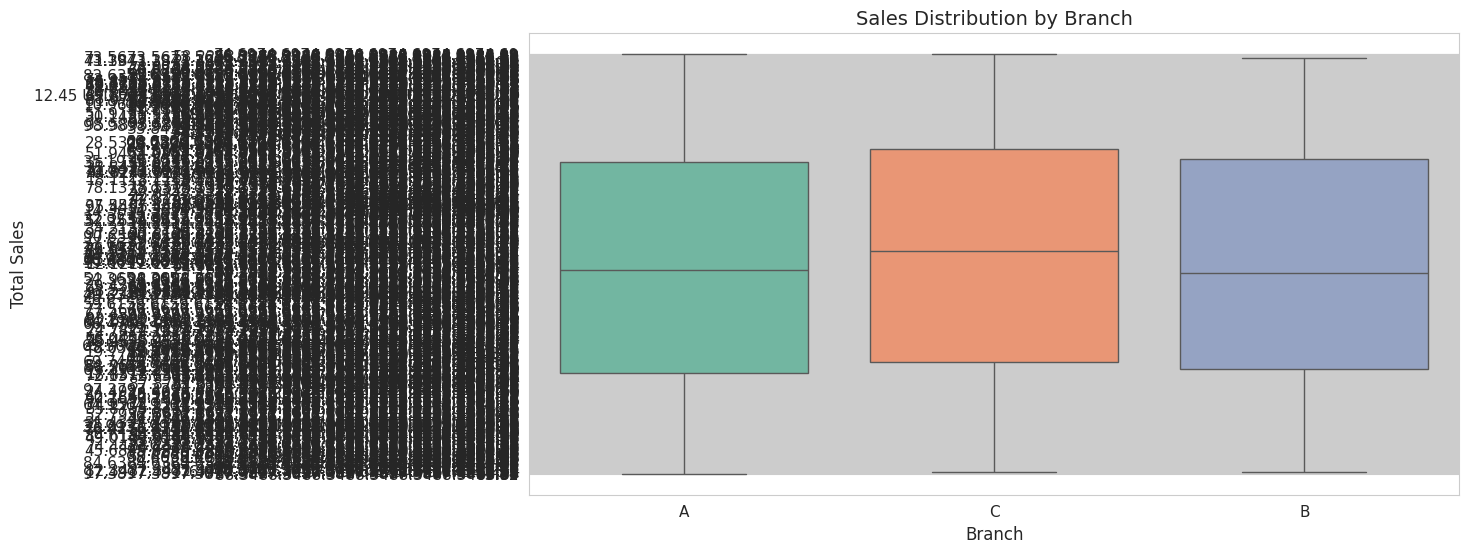

<ipython-input-3-080263a6657b>:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total_Sales', data=df, estimator=sum, ci=None, palette='viridis')
<ipython-input-3-080263a6657b>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total_Sales', data=df, estimator=sum, ci=None, palette='viridis')


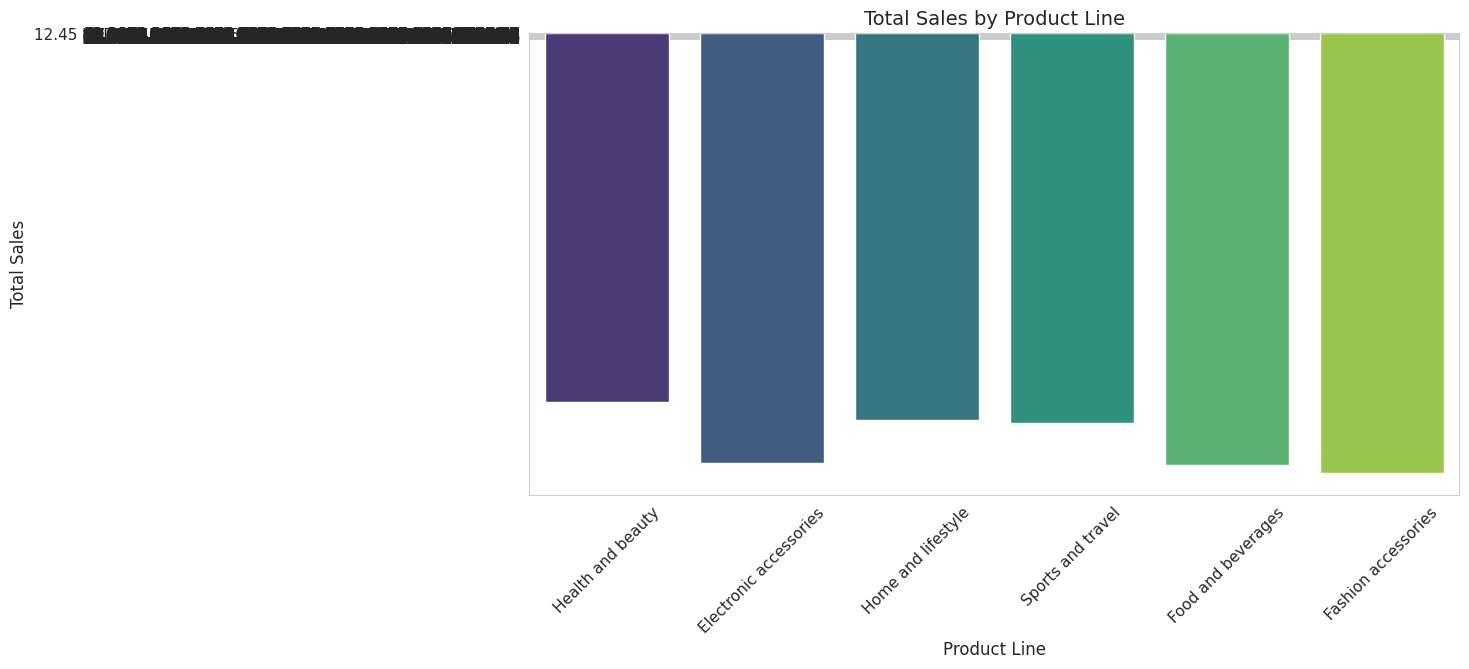

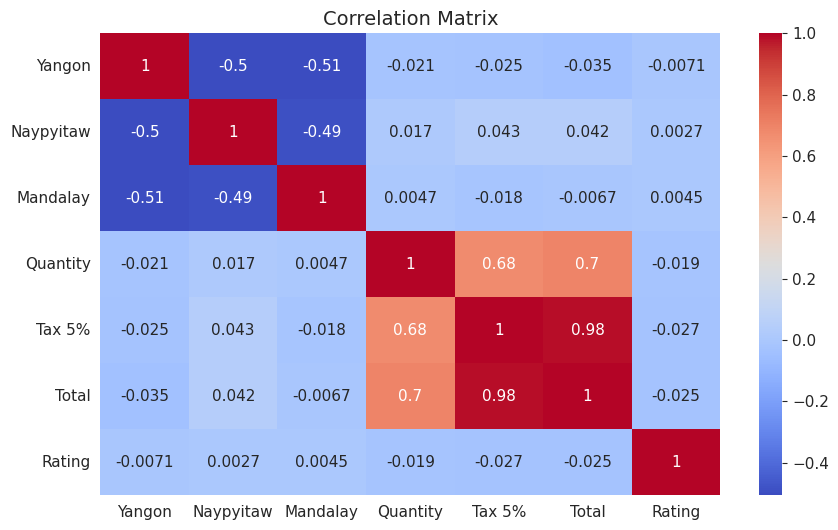


The cleaned data has been saved to 'Cleaned_Supermarket_Sales.csv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/Python Project Data - Supermarket Sales.csv')

print("First 5 rows of the data:")
print(df.head())

print("\nGeneral information about the data:")
print(df.info())

print("\nDescriptive statistics of the data:")
print(df.describe())

print("\nNumber of missing values in each column:")
print(df.isnull().sum())

df['Date'] = pd.to_datetime(df['Date'])

df.drop_duplicates(inplace=True)

df.fillna(method='ffill', inplace=True)

# Calculate the total sales by multiplying 'Quantity' and 'Unit price'
df['Total_Sales'] = df['Quantity'] * df['Unit price']

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['Customer type', 'Gender', 'Payment'], drop_first=True)

# Improve visualization settings
sns.set_style("whitegrid")
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 11 # Corrected: Changed Params to plt.rcParams

# Sales distribution by branch
plt.figure(figsize=(12, 6))
sns.boxplot(x='Branch', y='Total_Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

# Total sales by product line
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total_Sales', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


df.to_csv('Cleaned_Supermarket_Sales.csv', index=False)
print("\nThe cleaned data has been saved to 'Cleaned_Supermarket_Sales.csv'")